# Pokémon Overview

> The Pokémon franchise revolves around 807 fictional species of collectible monsters, each having unique designs and skills. Conceived by Satoshi Tajiri in early 1989, Pokémon are creatures that inhabit the fictional Pokémon World. The designs for the multitude of species can draw inspiration from anything, such as inanimate objects, real-world animals, or mythology. Many Pokémon are capable of evolving into more powerful species, while others can undergo form changes and achieve similar results. Originally, only a handful of artists led by Ken Sugimori designed Pokémon. However, by 2013 a team of 20 artists worked together to create new species designs. Sugimori and Hironobu Yoshida lead the team and determine the final designs. Each iteration of the series has brought about praise and criticism over the numerous creatures - https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

----

> Nintendo/Creatures Inc./GAME FREAK inc. Pokémon, Pokémon character names, Nintendo 3DS, Nintendo DS, Wii, Wii U, and Wiiware are trademarks of Nintendo - https://www.pokemon.com/us/legal/

This work is in no way affiliated with the fine people above. It is intended for educational purposes under fair use.

Image Credit: https://veekun.com/dex/pokemon/bulbasaur

<img src="static/Bulbasaur.png" />

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Pokémon Data

Download the files from the interwebs and save it to my hard drive. Found a Github repo that has pokemon data as handy CSVs: https://github.com/veekun/pokedex

In [2]:
def download_file(url, destination):    
    r = requests.get(url, allow_redirects=True)
    open(destination, "wb").write(r.content)
    return

In [3]:
download_file("https://github.com/veekun/pokedex/raw/master/pokedex/data/csv/pokemon.csv", 
              "pokemon.csv")

Load our downloaded CSV into a Pandas DataFrame

In [4]:
df_pokemon = pd.read_csv("pokemon.csv")

**Preview of Pokemon Data**

* **id** - The unique id for the Pokemon
* **identifier** - The name of the Pokemon
* **species_id** - ???
* **height** - The height of the Pokemon
* **weight** - The weight of the Pokemon
* **base_experience** - Experience required for the Pokemon to level up
* **order** - ???
* **is_default** - ???

In [5]:
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default
0,1,bulbasaur,1,7,69,64,1,1
1,2,ivysaur,2,10,130,142,2,1
2,3,venusaur,3,20,1000,236,3,1
3,4,charmander,4,6,85,62,5,1
4,5,charmeleon,5,11,190,142,6,1


So what columns do we have?

In [6]:
df_pokemon.columns

Index(['id', 'identifier', 'species_id', 'height', 'weight', 'base_experience',
       'order', 'is_default'],
      dtype='object')

## Indexes and Uniqueness

So what's the very first column? It is the Index an automatically generated unique identifier for each row.

In [7]:
df_pokemon.index

RangeIndex(start=0, stop=964, step=1)

So is the `id` column actually unique?

In [8]:
df_pokemon["id"].is_unique

True

So we could use it as the Index to uniquely identify each row.

In [9]:
df_pokemon = df_pokemon.set_index("id")
df_pokemon.head()

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
1,bulbasaur,1,7,69,64,1,1
2,ivysaur,2,10,130,142,2,1
3,venusaur,3,20,1000,236,3,1
4,charmander,4,6,85,62,5,1
5,charmeleon,5,11,190,142,6,1


## Selecting Specific Columns

If we only want the names:

In [10]:
df_pokemon["identifier"]

id
1                      bulbasaur
2                        ivysaur
3                       venusaur
4                     charmander
5                     charmeleon
6                      charizard
7                       squirtle
8                      wartortle
9                      blastoise
10                      caterpie
11                       metapod
12                    butterfree
13                        weedle
14                        kakuna
15                      beedrill
16                        pidgey
17                     pidgeotto
18                       pidgeot
19                       rattata
20                      raticate
21                       spearow
22                        fearow
23                         ekans
24                         arbok
25                       pikachu
26                        raichu
27                     sandshrew
28                     sandslash
29                     nidoran-f
30                      nidorina
       

The above returns the column on it's own, however if we want multiple specific columns, as them as a list:

In [11]:
df_pokemon[["identifier", "base_experience"]]

,identifier,base_experience
id,,
1,bulbasaur,64
2,ivysaur,142
3,venusaur,236
4,charmander,62
5,charmeleon,142
6,charizard,240
7,squirtle,63
8,wartortle,142
9,blastoise,239


# Selecting Rows

## Exact Text Matches

Lets find the Pokemon called **electrode**. 

In [12]:
df_pokemon["identifier"] == "electrode"

id
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
         ...  
10128    False
10129    False
10130    False
10131    False
10132    False
10133    False
10134    False
10135    False
10136    False
10137    False
10138    False
10139    False
10140    False
10141    False
10142    False
10143    False
10144    False
10145    False
10146    False
10147    False
10148    False
10149    False
10150    False
10151    False
10152    False
10153    False
10154    False
10155    False
10156    False
10157    False
Name: identifier, Length: 964, dtype: bool

What we have above is an Indexer, which states for each Rows Index if the condition was met.

We can use the Index to get the specific rows we want.

In [13]:
# get me electrode
is_electrode_index = df_pokemon["identifier"] == "electrode"
df_pokemon[is_electrode_index]

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
101,electrode,101,12,666,172,144,1


Because we set the `id` to be the Index we can also lookup by Index value

In [14]:
# get the pokemon with the Index value of 101
df_pokemon.loc[101]

identifier         electrode
species_id               101
height                    12
weight                   666
base_experience          172
order                    144
is_default                 1
Name: 101, dtype: object

We can also lookup by position in the DataFrame, which as position start counting from 0, we don't get **electrode** when at what is at position 101 we get **exeggcute**.

In [15]:
# get me the pokemon that's 10th in the dataframe
df_pokemon.iloc[101] # because 0 based index

identifier         exeggcute
species_id               102
height                     4
weight                    25
base_experience           65
order                    145
is_default                 1
Name: 102, dtype: object

## Partial Text Matching

For a series (column) get the values as string and then apply  string `contains` operation to determine if a specific value in the series matches `"pika"`.

Also lets make a seperate DataFrame that just has Pikachus.

In [16]:
# find me the pikachus
pika_index = df_pokemon["identifier"].astype(str).str.contains("pika")
df_pikachus = df_pokemon[pika_index]
df_pikachus

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
25,pikachu,25,4,60,112,35,1
10080,pikachu-rock-star,25,4,60,112,37,0
10081,pikachu-belle,25,4,60,112,38,0
10082,pikachu-pop-star,25,4,60,112,39,0
10083,pikachu-phd,25,4,60,112,40,0
10084,pikachu-libre,25,4,60,112,41,0
10085,pikachu-cosplay,25,4,60,112,36,0
10094,pikachu-original-cap,25,4,60,112,36,0
10095,pikachu-hoenn-cap,25,4,60,112,37,0


How many Pikachus do we have?

In [17]:
len(df_pikachus)

14

# Numerical Conditions

Let's get some basic summary statistics for the height of our pokemon.

In [18]:
df_pokemon["height"].mean()

12.464730290456432

In [19]:
df_pokemon["height"].std()

12.926254639816213

In [20]:
df_pokemon["height"].median()

10.0

Or a single call to to get summary statistics.

In [21]:
df_pokemon["height"].describe()

count    964.000000
mean      12.464730
std       12.926255
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max      145.000000
Name: height, dtype: float64

Lets get the tallest Pokemon in the highest quartile.

In [22]:
tallest_quartile_height = df_pokemon["height"].describe()["75%"]
print("tallest_quartile_height", tallest_quartile_height)

tallest_quartile_height 15.0


In [23]:
tallest_quartile_height_index = df_pokemon["height"] >= tallest_quartile_height

How many Pokemon are in the tallest quartile

In [24]:
len(df_pokemon[tallest_quartile_height_index])

274

How many are not in the tallest quartile?

In [25]:
len(df_pokemon[~tallest_quartile_height_index])

690

How many Pokemon in total?

In [26]:
len(df_pokemon)

964

# Grouping  and Aggregation

Let's apply some grouping by height and weight

In [27]:
df_pokemon.groupby(["height", "weight"])

However we need to apply an operation to the Grouping in order for it be useful. So let's count.

The call to the count is wrapped in a DataFrame so it displays in a formatted table.

In [28]:
df_pokemon_grouped_height_weight = pd.DataFrame(
    df_pokemon.groupby(["height", "weight"])["identifier"].count()
)

# lets look at the first ten 10 rows
df_pokemon_grouped_height_weight.head(10)

identifier
height weight            
1      1                1
       2                1
       3                1
       6                1
       9999             1
2      1                1
       3                2
       5                2
       6                1
       7                2

This DataFrame is a little different to the ones we've seen thus far. As it has two indexes, the columns we grouped by:

In [29]:
df_pokemon_grouped_height_weight.index.names

FrozenList(['height', 'weight'])

So what columns do we have?

In [30]:
df_pokemon_grouped_height_weight.columns

Index(['identifier'], dtype='object')

### Renaming columns

The counted identifiers doesn't have a descriptive column name, so lets rename it.

In [31]:
df_pokemon_grouped_height_weight.columns = ["pokemon_count"]
df_pokemon_grouped_height_weight.head(10)

pokemon_count
height weight               
1      1                   1
       2                   1
       3                   1
       6                   1
       9999                1
2      1                   1
       3                   2
       5                   2
       6                   1
       7                   2

# Correlations

As you may recall we have a number of Pikachus

In [32]:
df_pikachus

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
25,pikachu,25,4,60,112,35,1
10080,pikachu-rock-star,25,4,60,112,37,0
10081,pikachu-belle,25,4,60,112,38,0
10082,pikachu-pop-star,25,4,60,112,39,0
10083,pikachu-phd,25,4,60,112,40,0
10084,pikachu-libre,25,4,60,112,41,0
10085,pikachu-cosplay,25,4,60,112,36,0
10094,pikachu-original-cap,25,4,60,112,36,0
10095,pikachu-hoenn-cap,25,4,60,112,37,0


It seems that there is a relationship between `species_id` and the `id`. All of the Pikachus have a `species_id` of 25, which is the `id` of the first pikachu. 

Let's see what correlations we have in our dataset. Particularly those correlations with the `id`.

In [33]:
df_pokemon.corr()

,species_id,height,weight,base_experience,order,is_default
species_id,1.000000,0.027057,0.102484,0.138612,0.976901,-0.005692
height,0.027057,1.000000,0.663162,0.491484,0.026529,-0.147441
weight,0.102484,0.663162,1.000000,0.437724,0.100532,-0.109774
base_experience,0.138612,0.491484,0.437724,1.000000,0.127581,-0.271400
order,0.976901,0.026529,0.100532,0.127581,1.000000,-0.017405
is_default,-0.005692,-0.147441,-0.109774,-0.271400,-0.017405,1.000000


But `id` isn't listed above, as we moved `id` to the index - it's not available as a column.

In [34]:
df_pokemon.columns

Index(['identifier', 'species_id', 'height', 'weight', 'base_experience',
       'order', 'is_default'],
      dtype='object')

So let's reset the index back to an automatic incrementing number so we can use `id` as a column again.

In [35]:
df_pokemon = df_pokemon.reset_index()
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default
0,1,bulbasaur,1,7,69,64,1,1
1,2,ivysaur,2,10,130,142,2,1
2,3,venusaur,3,20,1000,236,3,1
3,4,charmander,4,6,85,62,5,1
4,5,charmeleon,5,11,190,142,6,1


In [36]:
df_pokemon.corr()

,id,species_id,height,weight,base_experience,order,is_default
id,1.000000,0.058617,0.148452,0.116083,0.277686,0.068772,-0.998212
species_id,0.058617,1.000000,0.027057,0.102484,0.138612,0.976901,-0.005692
height,0.148452,0.027057,1.000000,0.663162,0.491484,0.026529,-0.147441
weight,0.116083,0.102484,0.663162,1.000000,0.437724,0.100532,-0.109774
base_experience,0.277686,0.138612,0.491484,0.437724,1.000000,0.127581,-0.271400
order,0.068772,0.976901,0.026529,0.100532,0.127581,1.000000,-0.017405
is_default,-0.998212,-0.005692,-0.147441,-0.109774,-0.271400,-0.017405,1.000000


There is a strong negative correlation with `is_default` and `id`. Let's look into that.

We know that `id` is a unique value, so lets split the data by the values of `is_default`.

In [37]:
df_pokemon["is_default"].unique()

array([1, 0], dtype=int64)

In [38]:
df_pokemon[df_pokemon["is_default"] == 0].corr()

,id,species_id,height,weight,base_experience,order,is_default
id,1.000000,0.244311,-0.002900,0.008478,-0.249388,0.242709,NaN
species_id,0.244311,1.000000,0.024338,0.023907,0.157718,0.997110,NaN
height,-0.002900,0.024338,1.000000,0.708867,0.496237,0.022983,NaN
weight,0.008478,0.023907,0.708867,1.000000,0.479319,0.024781,NaN
base_experience,-0.249388,0.157718,0.496237,0.479319,1.000000,0.166263,NaN
order,0.242709,0.997110,0.022983,0.024781,0.166263,1.000000,NaN
is_default,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_pokemon[df_pokemon["is_default"] == 1].corr()

,id,species_id,height,weight,base_experience,order,is_default
id,1.000000,1.000000,0.028166,0.130990,0.139171,0.971022,NaN
species_id,1.000000,1.000000,0.028166,0.130990,0.139171,0.971022,NaN
height,0.028166,0.028166,1.000000,0.636421,0.489375,0.025419,NaN
weight,0.130990,0.130990,0.636421,1.000000,0.417783,0.126280,NaN
base_experience,0.139171,0.139171,0.489375,0.417783,1.000000,0.118680,NaN
order,0.971022,0.971022,0.025419,0.126280,0.118680,1.000000,NaN
is_default,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Where `is_default == 1` there is a direct positive correlation between `id` and `species_id`. 

Where `is_default == 0` there is no significant correlation between `id` and `species_id`.

Let's plot these relationships.

In [40]:
def pair_plot_correlations(df):
    return sns.pairplot(df[["id", "species_id", "order"]])

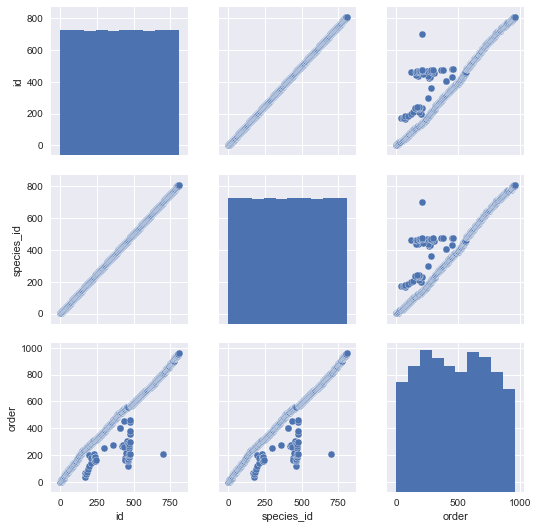

In [41]:
pair_plot_correlations(df_pokemon[df_pokemon["is_default"] == 1])

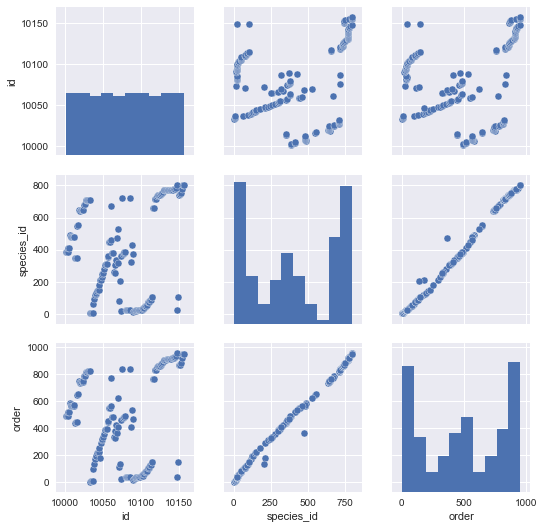

In [42]:
pair_plot_correlations(df_pokemon[df_pokemon["is_default"] == 0])

So are the variants (where the `id ` doesn't match the `species_id`) only different in name or is there some other variation?

In [43]:
variant_pokemon_index = df_pokemon["id"] != df_pokemon["species_id"]
is_default_index = df_pokemon["is_default"] == 1

### get_duplicate_indexes

For a given DataFrame `df` find which rows have duplicated values for the `columns` (an array/list), keeping the first match.

In [44]:
def get_duplicate_indexes(df, columns):
    return df.duplicated(columns, keep = "first")

In [45]:
df_duplicated_pokemon = df_pokemon[
    get_duplicate_indexes(df_pokemon, ["species_id", "height", "weight", "base_experience"])
]

In [46]:
df_duplicated_pokemon

,id,identifier,species_id,height,weight,base_experience,order,is_default
807,10001,deoxys-attack,386,17,608,270,491,0
808,10002,deoxys-defense,386,17,608,270,492,0
809,10003,deoxys-speed,386,17,608,270,493,0
810,10004,wormadam-sandy,413,5,65,148,519,0
811,10005,wormadam-trash,413,5,65,148,520,0
815,10009,rotom-wash,479,3,3,182,565,0
816,10010,rotom-frost,479,3,3,182,566,0
817,10011,rotom-fan,479,3,3,182,567,0
818,10012,rotom-mow,479,3,3,182,568,0
819,10013,castform-sunny,351,3,8,147,441,0


let's omit the rows in `df_pokemon` where the `id` appears in `df_duplicated_pokemon`.

In [47]:
len(df_pokemon)

964

In [48]:
df_pokemon = df_pokemon[~df_pokemon["id"].isin(df_duplicated_pokemon["id"])]

In [49]:
len(df_pokemon)

909

Let's drop the duplciated rows

# Basic Plotting

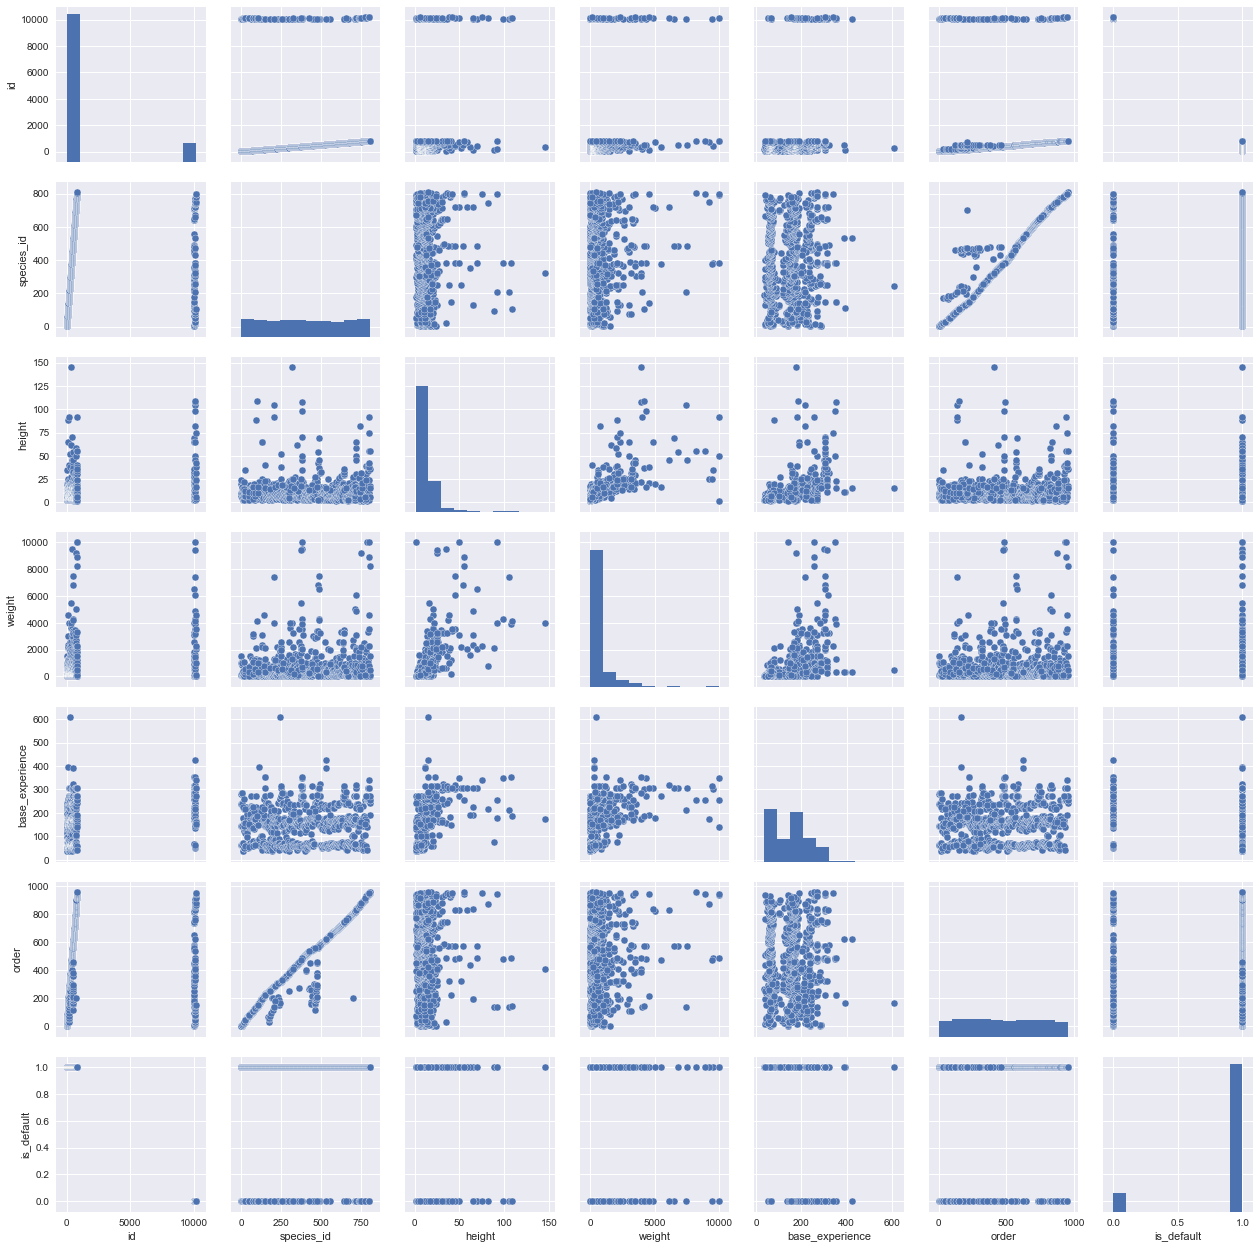

In [50]:
sns.pairplot(df_pokemon)

We've got interactions that don't make for sensible plots.
* `is_default` is a binary value (1 or 0 aka True or False), a scatter plot doesn't make sense.
* `species_id` while numeric, seems to be an ordinal value (https://en.wikipedia.org/wiki/Ordinal_data), the "distance" between two values is not readily understandable or possibly even comparable.

So let's only select specific columns

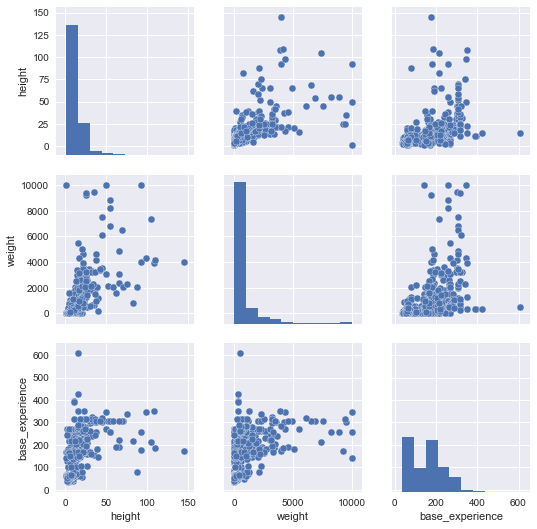

In [51]:
sns.pairplot(df_pokemon[["height", "weight", "base_experience"]])

# Download Additional Pokemon Data

Now that we've gotten a handle on the core Pokemon data lets get some additional data.

In [52]:
def load_pokemon_data(filename):
    url = "https://github.com/veekun/pokedex/raw/master/pokedex/data/csv/"
    download_file(url + filename, filename)
    return pd.read_csv(filename)

# Types

* **id** - Unique ID for Type
* **identifier** - Name of the type
* **generation_id** - When was the type introduced
* **damage_class_id** - ???

In [53]:
df_types = load_pokemon_data("types.csv")
df_types.sample(5)

,id,identifier,generation_id,damage_class_id
13,14,psychic,1,3.0
11,12,grass,1,3.0
1,2,fighting,1,2.0
4,5,ground,1,2.0
15,16,dragon,1,3.0


In [54]:
df_types["id"].is_unique

True

# Pokemon Types

Linking Pokemon to Types

In [55]:
df_pokemon_types = load_pokemon_data("pokemon_types.csv")
df_pokemon_types.sample(5)

,pokemon_id,type_id,slot
1417,10121,1,1
943,642,3,2
335,229,17,1
870,595,7,1
273,189,3,2


### Duplicated Pokemon Types

Can a Pokemon have more than 1 type?

In [56]:
duplicate_index = get_duplicate_indexes(df_pokemon_types, ["pokemon_id", "type_id"])
print("number of duplicated rows:", len(df_pokemon_types[duplicate_index]))

number of duplicated rows: 0


# Joining DataFrames

Let's join the seperated datasources, in a fashion not to dissimilar to a SQL style join.

<img src="static/merging_merge_on_key.png">
Credit: Pandas Project - https://pandas.pydata.org/pandas-docs/stable/merging.html#brief-primer-on-merge-methods-relational-algebra

In [57]:
df_pokemon = df_pokemon.merge(df_pokemon_types, left_on="id", right_on="pokemon_id", how="inner")
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default,pokemon_id,type_id,slot
0,1,bulbasaur,1,7,69,64,1,1,1,12,1
1,1,bulbasaur,1,7,69,64,1,1,1,4,2
2,2,ivysaur,2,10,130,142,2,1,2,12,1
3,2,ivysaur,2,10,130,142,2,1,2,4,2
4,3,venusaur,3,20,1000,236,3,1,3,12,1


But now we've got some extranious columns, lets get rid of them.

In [58]:
df_pokemon = df_pokemon.drop(["pokemon_id"], axis = 1)

Speaking of columns, we have columns with the same names in our `df_pokemon` and `df_types` dataframes.

Thankfully we can specify a suffix when merging dataframes.

In [59]:
df_types.columns

Index(['id', 'identifier', 'generation_id', 'damage_class_id'], dtype='object')

In [60]:
df_pokemon.columns

Index(['id', 'identifier', 'species_id', 'height', 'weight', 'base_experience',
       'order', 'is_default', 'type_id', 'slot'],
      dtype='object')

In [61]:
df_pokemon = df_pokemon.merge(df_types, 
                              left_on="type_id", 
                              right_on="id", 
                              how="inner", 
                              suffixes=("", "_type"))
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default,type_id,slot,id_type,identifier_type,generation_id,damage_class_id
0,1,bulbasaur,1,7,69,64,1,1,12,1,12,grass,1,3.0
1,2,ivysaur,2,10,130,142,2,1,12,1,12,grass,1,3.0
2,3,venusaur,3,20,1000,236,3,1,12,1,12,grass,1,3.0
3,43,oddish,43,5,54,64,68,1,12,1,12,grass,1,3.0
4,44,gloom,44,8,86,138,69,1,12,1,12,grass,1,3.0


In [62]:
df_pokemon = df_pokemon.drop(["type_id", "id_type"], axis = 1)
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default,slot,identifier_type,generation_id,damage_class_id
0,1,bulbasaur,1,7,69,64,1,1,1,grass,1,3.0
1,2,ivysaur,2,10,130,142,2,1,1,grass,1,3.0
2,3,venusaur,3,20,1000,236,3,1,1,grass,1,3.0
3,43,oddish,43,5,54,64,68,1,1,grass,1,3.0
4,44,gloom,44,8,86,138,69,1,1,grass,1,3.0


# Categorical Data

Working with categorical data, e.g. `identifier_type` sometimes require you to generate 'dummy' values.

In [63]:
dummy_types_df = pd.get_dummies(df_pokemon["identifier_type"])
dummy_types_df.sample(5)

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
157,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1360,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
179,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
865,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Tack these new columns onto the end of the exisiting columns

In [64]:
df_pokemon = pd.concat([df_pokemon, dummy_types_df], axis=1)
df_pokemon = df_pokemon.drop(["identifier_type"], axis = 1)
df_pokemon.columns

Index(['id', 'identifier', 'species_id', 'height', 'weight', 'base_experience',
       'order', 'is_default', 'slot', 'generation_id', 'damage_class_id',
       'bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
       'psychic', 'rock', 'steel', 'water'],
      dtype='object')

# Predicting `base_experience` with Linear Regression

# Selection of Predictor Variables

When attempting to use linear regression it's important to first establish if there is a linear pattern between the variable we're attempting to predict **the dependant variable** (or *y* - which we have a single variable) and the variables we believe are related to changes in *y* - the **indepedant variables** (or *x* - of which we could have several variables).

First lets exclude some columns we know are unlikely to have a relationship on `base_experience`, such as identifiers.

In [65]:
# the columns we want to exclude from our linear model
lm_drop_columns = ["id", "identifier", "order", "is_default", "slot", "damage_class_id", "species_id", "generation_id"]

In [66]:
# so lets see what we're keeping
lm_keep_columns = [col for col in df_pokemon.columns if col not in lm_drop_columns]
lm_keep_columns

['height',
 'weight',
 'base_experience',
 'bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water']

For each of our keep columns let's do a regression plot against `base_experience`

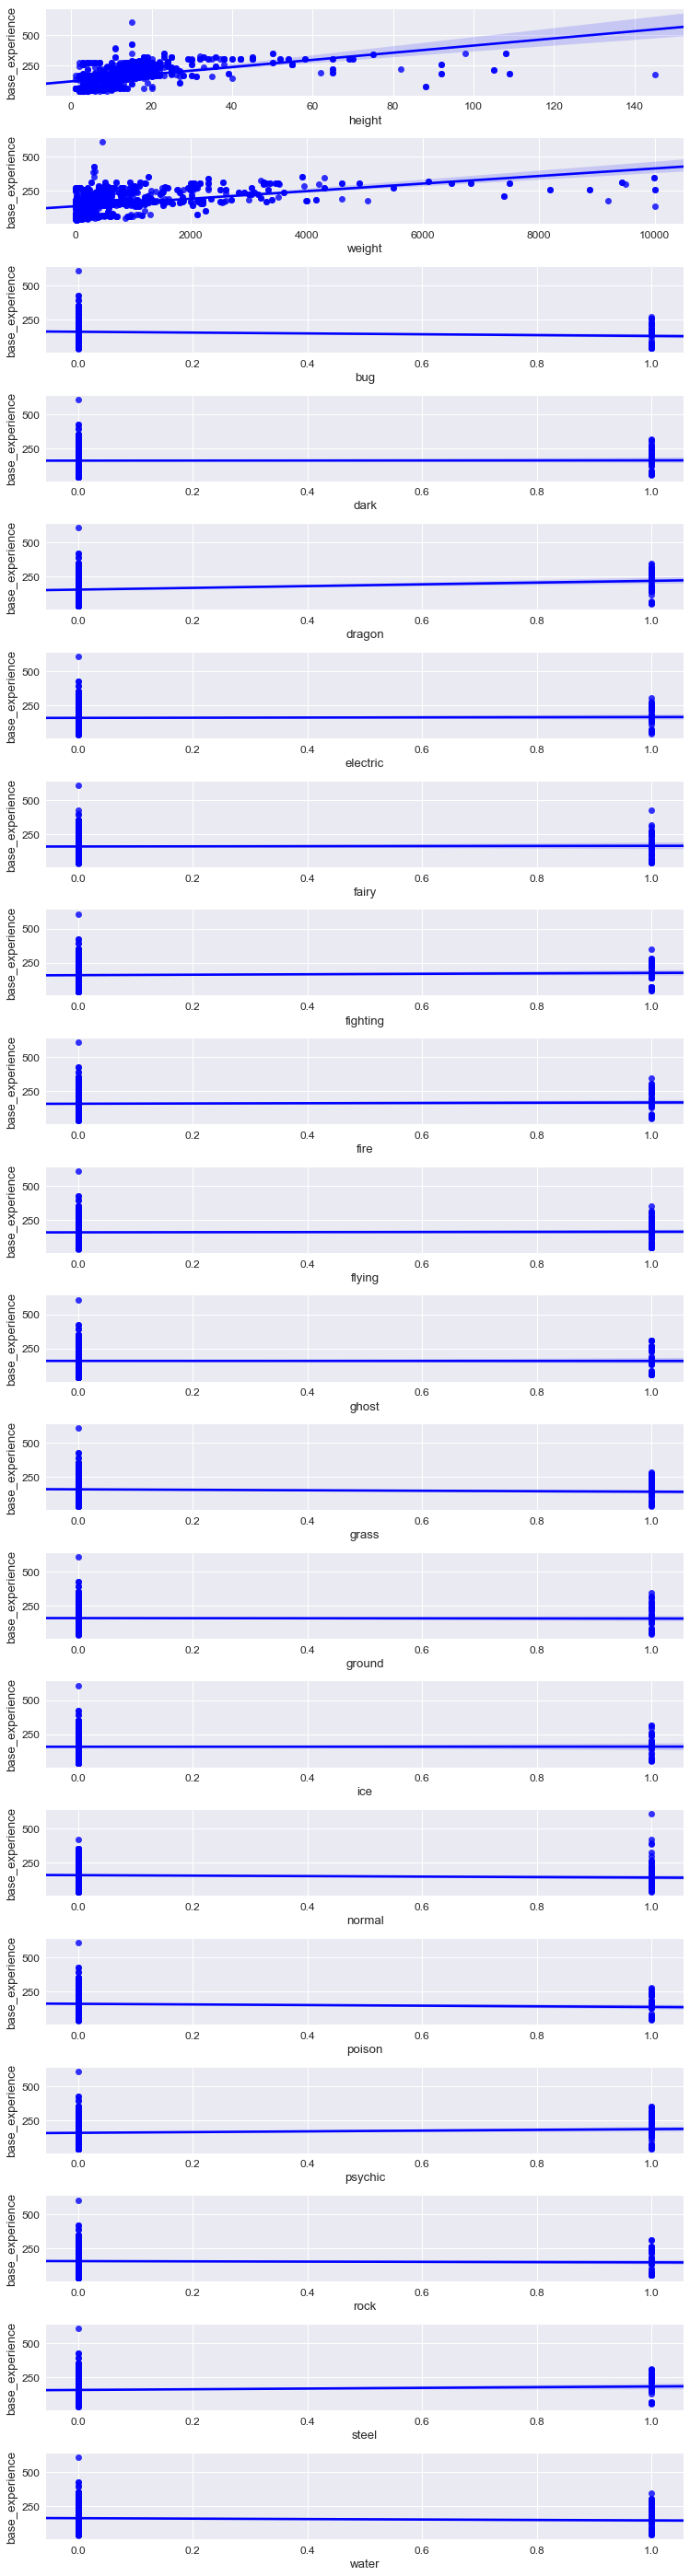

In [67]:
a4_dims = (11.7, 8.27)
# fig, axs = plt.subplots(ncols=2, nrows = math.ceil(len(lm_keep_columns)/2), figsize=a4_dims)

sns.set(font_scale=1.2)
fig, axs = plt.subplots(nrows = len(lm_keep_columns)-1, figsize=(12.4, 50.54))

row = 0
for i, keep_column in enumerate(lm_keep_columns):
    
    if keep_column == "base_experience":
        continue
        
    sns.regplot(x = keep_column,  y = "base_experience", data = df_pokemon, color = "blue", ax=axs[row])
    
    row += 1

sns.plt.subplots_adjust(hspace = 0.5)

sns.plt.show()    

As we can see the types (eg. fire, water) don't seem to have a linear relationship with `base_experience` as the range of values for these varibles is binomial (zero or one) so we should exclude them too.

In [68]:
lm_keep_columns = ["base_experience", "weight", "height"]

## Training and Test Data

When buidling (or *fitting*) a predictive model from observed data, it may be tempting to use all available data to build your model.

However doing this will not give you an indication of how well your model will work on unseen data. Thus when building your model it's important apportion your data into **training** and **test** sets.

The training set will be used to build the model, while the test set which contains observations your model has not "seen" is used to validate the accuracy of the model you've built.

In [69]:
training_data = df_pokemon.sample(frac=0.8, replace=False, random_state = 1234)[lm_keep_columns]

In [70]:
training_data.columns

Index(['base_experience', 'weight', 'height'], dtype='object')

In [71]:
len(training_data)

1119

In [72]:
training_data.head()

,base_experience,weight,height
1244,234,343,10
885,278,484,16
576,54,40,3
1069,144,1520,12
227,248,460,16


In [73]:
test_data = df_pokemon.iloc[df_pokemon.index.difference(training_data.index)][lm_keep_columns]

In [74]:
test_data.columns

Index(['base_experience', 'weight', 'height'], dtype='object')

In [75]:
len(test_data)

280

In [76]:
test_data.head()

,base_experience,weight,height
3,64,54,5
5,221,186,12
10,221,155,17
12,186,1200,20
15,142,158,12


We need to separate our dependent variable (`base_experience`), i.e. the variable we are trying to predict, from the indepedent variables - i.e. the variables we are not trying to determine the variation of.

In [77]:
train_cols = [col for col in training_data.columns if col not in ["base_experience"]]
print(train_cols)

['weight', 'height']


In [78]:
training_data_y = training_data["base_experience"]
training_data = training_data[train_cols]

# Fitting the Linear Model

In [79]:
lm = LinearRegression(normalize = True)

In [80]:
lm.fit(training_data, training_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

The coefficients are modifiers assigned to each one of our independant variables.

In [81]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

In [82]:
lm.coef_

array([ 0.01326433,  2.0191237 ])

The intercept the predicted value for the dependant variable, where our independant variables are zero.

In [83]:
lm.intercept_

119.98476766149213

# Predictions and Evaluation Thereof

Now that we've fit the model, we can make some predictions!

In [84]:
predictions = lm.predict(test_data[train_cols])

### Evaluating Our Model

<img src="static/SSE_SSR_SST_R-squared.png">
Credit: Justin Zeltzer - http://www.zstatistics.com/videos/#/regression/

What is the Sum of Square Errors (SSE), that is the difference between the predicted values and the observed values.

This is the "unexplained error".

In [85]:
def get_SSE(actual_values, predicted_values):    
    SSE = np.sum((actual_values - predicted_values) ** 2)
    return SSE

In [86]:
SSE = get_SSE(test_data["base_experience"], predictions)
SSE

1324394.6558268594

What is the Sum of Squares due to Regression (SSR), that is the difference between the predicted values (i.e. the regressed values) and the mean of the observed values.

This is the "explainable error".

In [87]:
def get_SSR(actual_values, predicted_values):
    SSR = np.sum((predicted_values - np.mean(actual_values)) ** 2)
    return SSR

In [88]:
SSR = get_SSR(test_data["base_experience"], predictions)
SSR

475147.46941906511

What is our R Squared for the Test Error?

In [89]:
def get_R_Squared(actual_values, predicted_values):
    SSR = get_SSR(actual_values, predicted_values)
    SSE = get_SSE(actual_values, predicted_values)
    
    R_Squared = SSR / ( SSR + SSE )
    return R_Squared

In [90]:
R_Squared = get_R_Squared(test_data["base_experience"], predictions)
R_Squared

0.26403798096926001

# How does degrees of freedom relate to R2

As Degrees of Freedom decreases (ie. more variables are added to the model) R2 will only increase.

So we we've added a number of variables into our model, which are of unknown "quality" to improving the explanatory power of the model. So R2 is not a good indicator of our models explanatory power.

In [91]:
n = len(training_data_y)
k = len(train_cols)
degrees_of_freedom = n - k - 1
degrees_of_freedom

1116

In [92]:
def get_degrees_of_freedom(n, k):
    degrees_of_freedom = n - k - 1
    return degrees_of_freedom

# Adjusted R2

Adjusted R Squared accounts for the reduced explanatory power of a model when there is a low number of degrees of freedom.

In [93]:
1 - (1 - R_Squared) * (n - 1)/(degrees_of_freedom)

0.2627190526197426

# Predicted Values versus Actual

So let's plot the actual values (in blue) versus the predicted values (in red).

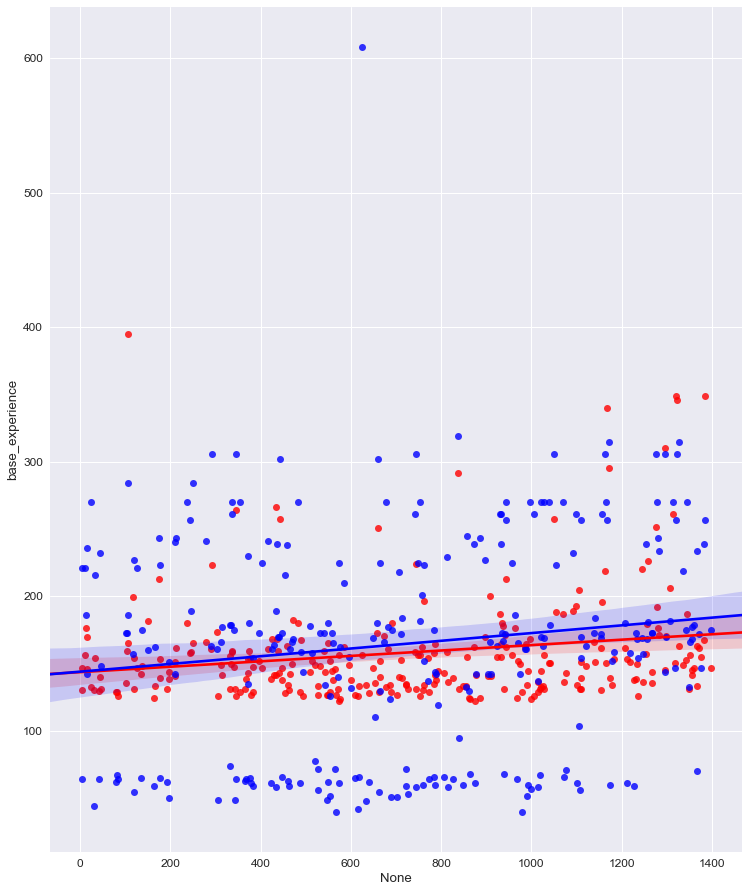

In [94]:
sns.set(font_scale=1.2)
fig, axs = plt.subplots(nrows = 1, figsize=(12.4, 15.54))

sns.regplot(test_data.index, predictions, color = "red")
sns.regplot(test_data.index, test_data["base_experience"], color = "blue")
sns.plt.show()